# 敵対的生成ネットワーク

```{attention}
作成途中！！！！！！！
```

## 原理とできること

Epoch         10 D-cost 1.1107 D-acc 0.6436 G-cost 0.7997 G-acc 0.6435 


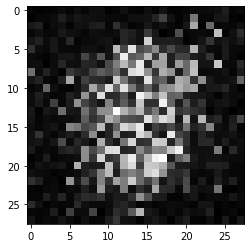

Epoch         20 D-cost 0.9283 D-acc 0.6191 G-cost 0.9106 G-acc 0.6191 


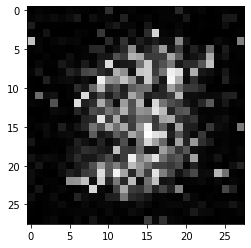

Epoch         30 D-cost 1.0065 D-acc 0.6088 G-cost 0.9221 G-acc 0.6088 


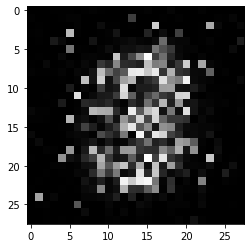

Epoch         40 D-cost 0.8369 D-acc 0.6028 G-cost 1.1005 G-acc 0.6028 


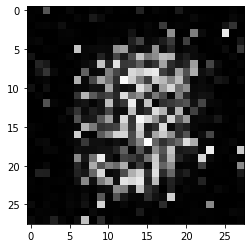

Epoch         50 D-cost 1.0493 D-acc 0.6009 G-cost 1.0443 G-acc 0.6009 


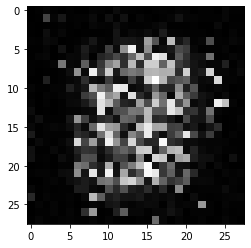

Epoch         60 D-cost 0.9747 D-acc 0.5986 G-cost 1.0770 G-acc 0.5986 


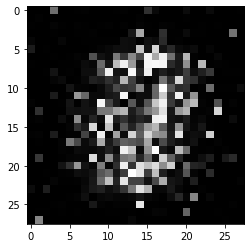

Epoch         70 D-cost 0.7635 D-acc 0.5978 G-cost 1.2667 G-acc 0.5978 


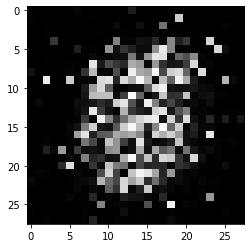

Epoch         80 D-cost 0.6072 D-acc 0.5985 G-cost 1.7480 G-acc 0.5985 


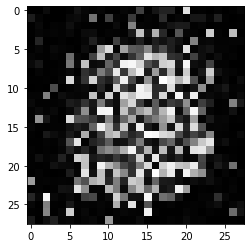

Epoch         90 D-cost 0.7804 D-acc 0.5993 G-cost 1.4536 G-acc 0.5993 


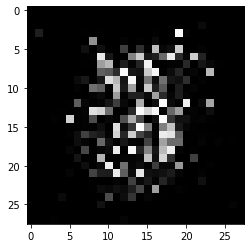

Epoch        100 D-cost 0.6673 D-acc 0.5995 G-cost 1.4898 G-acc 0.5995 


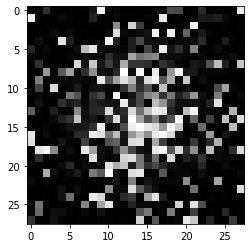

Epoch        110 D-cost 0.6547 D-acc 0.5999 G-cost 1.7489 G-acc 0.5999 


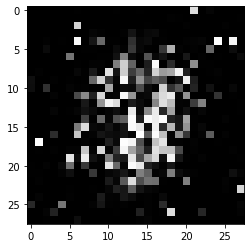

Epoch        120 D-cost 0.6511 D-acc 0.6003 G-cost 1.9028 G-acc 0.6003 


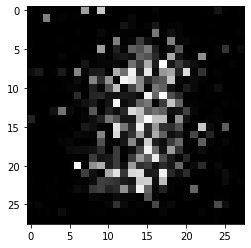

Epoch        130 D-cost 0.7035 D-acc 0.6004 G-cost 1.7107 G-acc 0.6004 


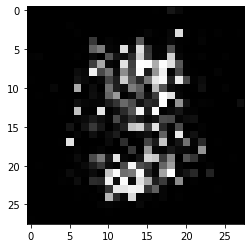

Epoch        140 D-cost 0.6870 D-acc 0.6012 G-cost 1.7095 G-acc 0.6012 


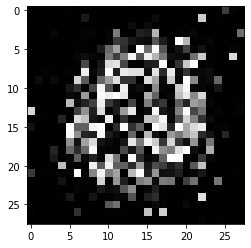

Epoch        150 D-cost 0.5924 D-acc 0.6024 G-cost 1.9551 G-acc 0.6024 


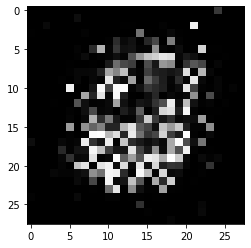

Epoch        160 D-cost 0.7548 D-acc 0.6030 G-cost 1.8127 G-acc 0.6030 


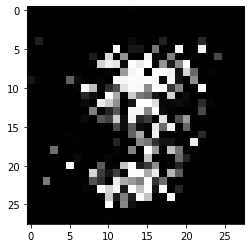

Epoch        170 D-cost 0.8097 D-acc 0.6031 G-cost 1.6193 G-acc 0.6031 


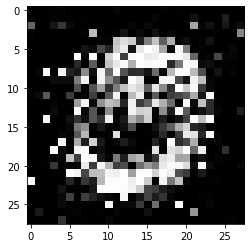

Epoch        180 D-cost 0.7262 D-acc 0.6033 G-cost 1.9192 G-acc 0.6033 


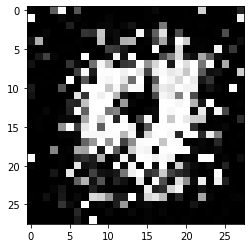

Epoch        190 D-cost 0.9757 D-acc 0.6031 G-cost 1.5803 G-acc 0.6031 


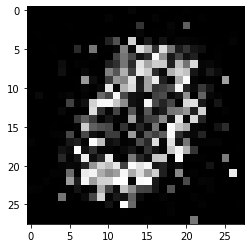

Epoch        200 D-cost 0.7472 D-acc 0.6027 G-cost 1.6379 G-acc 0.6027 


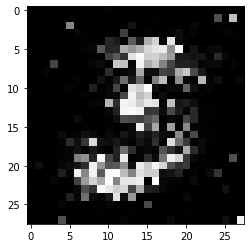

Epoch        210 D-cost 0.7991 D-acc 0.6022 G-cost 1.7155 G-acc 0.6022 


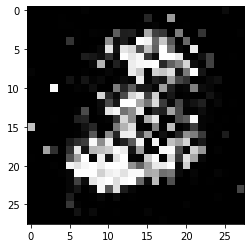

Epoch        220 D-cost 0.9454 D-acc 0.6018 G-cost 1.4421 G-acc 0.6018 


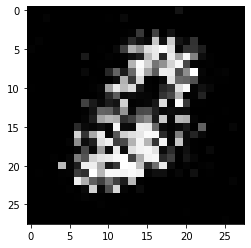

Epoch        230 D-cost 0.9417 D-acc 0.6011 G-cost 1.3794 G-acc 0.6011 


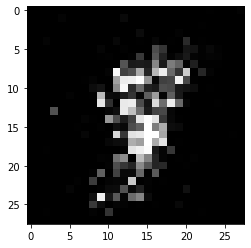

Epoch        240 D-cost 0.9590 D-acc 0.6004 G-cost 1.4567 G-acc 0.6004 


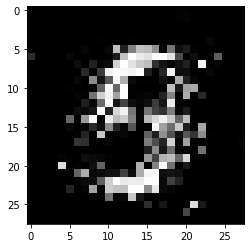

Epoch        250 D-cost 1.0064 D-acc 0.5997 G-cost 1.3432 G-acc 0.5997 


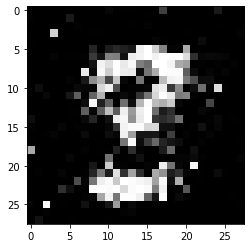

Epoch        260 D-cost 0.9637 D-acc 0.5988 G-cost 1.3761 G-acc 0.5988 


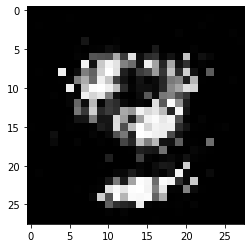

Epoch        270 D-cost 1.1010 D-acc 0.5978 G-cost 1.2554 G-acc 0.5978 


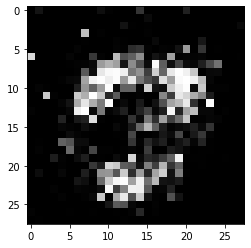

Epoch        280 D-cost 1.0397 D-acc 0.5968 G-cost 1.3100 G-acc 0.5968 


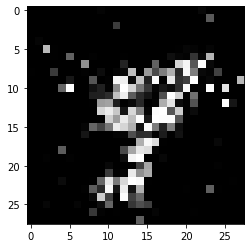

Epoch        290 D-cost 1.0753 D-acc 0.5959 G-cost 1.2557 G-acc 0.5959 


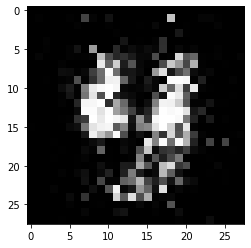

Epoch        300 D-cost 1.1180 D-acc 0.5950 G-cost 1.2414 G-acc 0.5950 


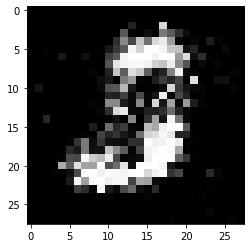

Epoch        310 D-cost 1.2188 D-acc 0.5940 G-cost 1.1174 G-acc 0.5940 


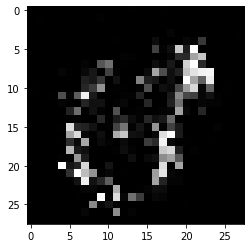

Epoch        320 D-cost 1.2051 D-acc 0.5928 G-cost 1.0565 G-acc 0.5928 


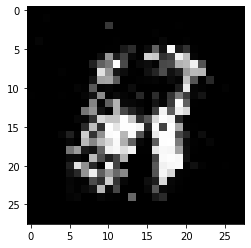

Epoch        330 D-cost 1.1204 D-acc 0.5919 G-cost 1.1396 G-acc 0.5919 


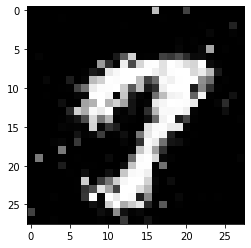

Epoch        340 D-cost 1.1579 D-acc 0.5909 G-cost 1.0961 G-acc 0.5909 


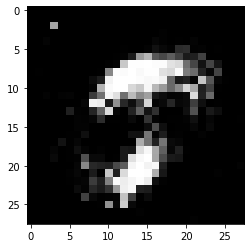

Epoch        350 D-cost 1.1818 D-acc 0.5899 G-cost 1.0175 G-acc 0.5899 


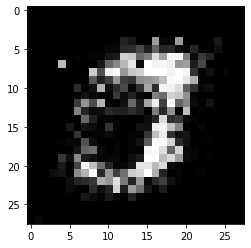

Epoch        360 D-cost 1.2716 D-acc 0.5890 G-cost 0.9914 G-acc 0.5890 


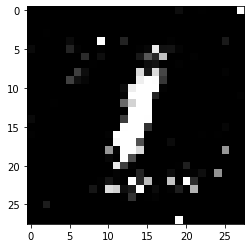

Epoch        370 D-cost 1.2312 D-acc 0.5880 G-cost 1.0492 G-acc 0.5880 


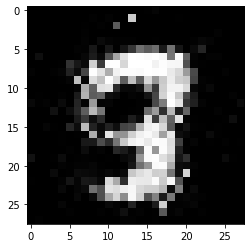

Epoch        380 D-cost 1.2259 D-acc 0.5870 G-cost 1.0414 G-acc 0.5870 


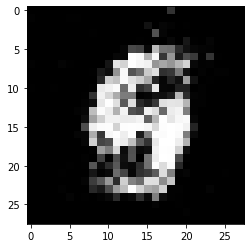

Epoch        390 D-cost 1.2000 D-acc 0.5859 G-cost 1.0428 G-acc 0.5859 


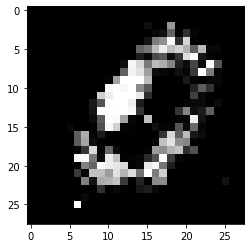

Epoch        400 D-cost 1.2338 D-acc 0.5848 G-cost 0.9621 G-acc 0.5848 


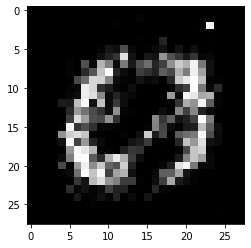

Epoch        410 D-cost 1.2726 D-acc 0.5838 G-cost 0.9824 G-acc 0.5838 


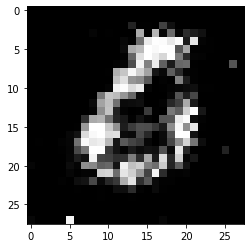

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(0)
np.random.seed(0)

def main():
    # ハイパーパラメータの設定
    MiniBatchSize = 300
    NoiseSize = 100 # GANはランダムなノイズベクトルから何かを生成する方法なので，そのノイズベクトルのサイズを設定する．
    MaxEpoch = 500
    
    # データセットの読み込み
    (learnX, learnT), (_, _) = tf.keras.datasets.mnist.load_data()
    learnX = np.asarray(learnX.reshape([60000, 784]), dtype="float32")
    learnX = (learnX - 127.5) / 127.5
    
    # 生成器と識別器の構築
    generator = Generator() # 下のクラスを参照．
    discriminator = Discriminator() # 下のクラスを参照．
    
    # コスト関数と正確度を計算する関数の生成
    costComputer = tf.keras.losses.SparseCategoricalCrossentropy()
    accuracyComputer = tf.keras.metrics.SparseCategoricalAccuracy()
    
    # オプティマイザは生成器と識別器で別々のものを利用
    optimizerGenerator = tf.keras.optimizers.Adam(learning_rate=0.0001)
    optimizerDiscriminator = tf.keras.optimizers.Adam(learning_rate=0.00004)
    
    # 生成器を成長させるためのコストを計算する関数
    def generatorCostFunction(discriminatorOutputFromGenerated):
        cost = costComputer(tf.ones(discriminatorOutputFromGenerated.shape[0]), discriminatorOutputFromGenerated) # 生成器のコストの引数は生成器の出力を識別器に入れた結果．生成器としては全部正解を出しているはずなので教師はすべて1となるはず．そのように学習すべき．
        accuracy = accuracyComputer(tf.ones(discriminatorOutputFromGenerated.shape[0]), discriminatorOutputFromGenerated)
        return cost, accuracy
    
    # 識別器を成長させるためのコストを計算する関数
    def discriminatorCostFunction(discriminatorOutputFromReal,discriminatorOutputFromGenerated): # 識別器のコストの引数は本物の情報を識別器に入れた結果と生成器の出力を識別器に入れた結果．
        realCost = costComputer(tf.ones(discriminatorOutputFromReal.shape[0]), discriminatorOutputFromReal) # 本物の情報の場合はすべて正例（1）と判断すべき．これが例のコスト関数の左の項に相当．
        fakeCost = costComputer(tf.zeros(discriminatorOutputFromGenerated.shape[0]), discriminatorOutputFromGenerated) # 偽物の情報の場合はすべて負例（0）と判断すべき．これが例のコスト関数の右の項に相当．
        cost = realCost + fakeCost
        realAccuracy = accuracyComputer(tf.ones(discriminatorOutputFromReal.shape[0]), discriminatorOutputFromReal)
        fakeAccuracy = accuracyComputer(tf.zeros(discriminatorOutputFromGenerated.shape[0]), discriminatorOutputFromGenerated)
        accuracy=(realAccuracy + fakeAccuracy) / 2
        return cost, accuracy
    
    @tf.function()
    def run(generator, discriminator, noiseVector, realVector):
        with tf.GradientTape() as generatorTape, tf.GradientTape() as discriminatorTape:
            generatedVector = generator(noiseVector) # 生成器によるデータの生成．
            discriminatorOutputFromGenerated = discriminator(generatedVector) # その生成データを識別器に入れる．
            discriminatorOutputFromReal = discriminator(realVector) # 本物データを識別器に入れる．
            # 識別器の成長
            discriminatorCost, discriminatorAccuracy = discriminatorCostFunction(discriminatorOutputFromReal, discriminatorOutputFromGenerated)
            gradientDiscriminator = discriminatorTape.gradient(discriminatorCost, discriminator.trainable_variables) # 識別器のパラメータだけで勾配を計算．つまり生成器のパラメータは行わない．
            optimizerDiscriminator.apply_gradients(zip(gradientDiscriminator, discriminator.trainable_variables))
            # 生成器の成長
            generatorCost, generatorAccuracy = generatorCostFunction(discriminatorOutputFromGenerated)
            gradientGenerator = generatorTape.gradient(generatorCost,generator.trainable_variables) # 生成器のパラメータで勾配を計算．
            optimizerGenerator.apply_gradients(zip(gradientGenerator,generator.trainable_variables))
            return discriminatorCost, discriminatorAccuracy, generatorCost, generatorAccuracy
    
    # ミニバッチセットの生成
    learnX = tf.data.Dataset.from_tensor_slices(learnX) # このような方法を使うと簡単にミニバッチを実装することが可能．
    learnT = tf.data.Dataset.from_tensor_slices(learnT)
    learnA = tf.data.Dataset.zip((learnX, learnT)).shuffle(60000).batch(MiniBatchSize) # 今回はインプットデータしか使わないけど後にターゲットデータを使う場合があるため．
    miniBatchNumber = len(list(learnA.as_numpy_iterator()))
    # 学習ループ
    for epoch in range(1,MaxEpoch+1):
        discriminatorCost, discriminatorAccuracy, generatorCost, generatorAccuracy = 0, 0, 0, 0
        for learnx, _ in learnA:
            noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
            discriminatorCostTmp, discriminatorAccuracyTmp, generatorCostTmp, generatorAccuracyTmp = run(generator, discriminator, noiseVector, learnx)
            discriminatorCost += discriminatorCostTmp / miniBatchNumber
            discriminatorAccuracy += discriminatorAccuracyTmp / miniBatchNumber
            generatorCost += generatorCostTmp / miniBatchNumber
            generatorAccuracy += generatorAccuracyTmp / miniBatchNumber
        # 疑似的なテスト
        if epoch%10 == 0:
            print("Epoch {:10d} D-cost {:6.4f} D-acc {:6.4f} G-cost {:6.4f} G-acc {:6.4f} ".format(epoch,float(discriminatorCost),float(discriminatorAccuracy),float(generatorCost),float(generatorAccuracy)))
            validationNoiseVector = generateNoise(1, NoiseSize)
            validationOutput = generator(validationNoiseVector)
            validationOutput = np.asarray(validationOutput).reshape([1, 28, 28])
            plt.imshow(validationOutput[0], cmap = "gray")
            plt.pause(1)

# 入力されたデータを0か1に分類するネットワーク
class Discriminator(tf.keras.Model):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.d1 = tf.keras.layers.Dense(units=128)
        self.d2 = tf.keras.layers.Dense(units=128)
        self.d3 = tf.keras.layers.Dense(units=128)
        self.d4 = tf.keras.layers.Dense(units=2, activation="softmax")
        self.a = tf.keras.layers.LeakyReLU()
        self.d = tf.keras.layers.Dropout(0.5)
    def call(self,x):
        y = self.d1(x)
        y = self.a(y)
        y = self.d(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.d(y)
        y = self.d3(y)
        y = self.a(y)
        y = self.d(y)
        y = self.d4(y)
        return y

# 入力されたベクトルから別のベクトルを生成するネットワーク
class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator,self).__init__()
        self.d1=tf.keras.layers.Dense(units=256)
        self.d2=tf.keras.layers.Dense(units=256)
        self.d3=tf.keras.layers.Dense(units=784)
        self.a=tf.keras.layers.LeakyReLU()
        self.b1=tf.keras.layers.BatchNormalization()
        self.b2=tf.keras.layers.BatchNormalization()
    def call(self,x):
        y = self.d1(x)
        y = self.a(y)
        y = self.b1(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.b2(y)
        y = self.d3(y)
        y = tf.keras.activations.tanh(y)
        return y

def generateNoise(miniBatchSize, randomNoiseSize):
    return np.random.uniform(-1,1,size=(miniBatchSize,randomNoiseSize)).astype("float32")

if __name__ == "__main__":
    main()

11501568/11490434 [==============================] - 0s 0us/step
Epoch         10 D-cost -1005.1382 G-cost 702.6826 


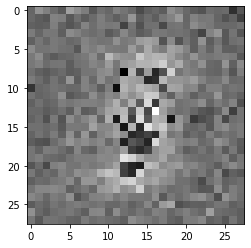

Epoch         20 D-cost -1194.6140 G-cost 765.3205 


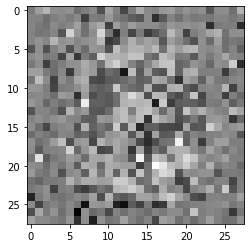

Epoch         30 D-cost -490745.3438 G-cost -3061580.0000 


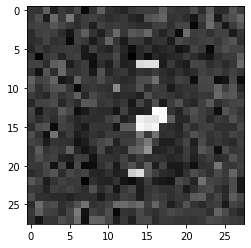

Epoch         40 D-cost -164263.6719 G-cost -669688.0625 


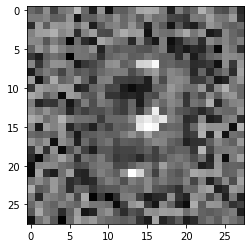

Epoch         50 D-cost 32528533504.0000 G-cost 448703.7812 


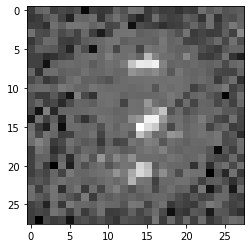

Epoch         60 D-cost 199610744832.0000 G-cost -4895457.5000 


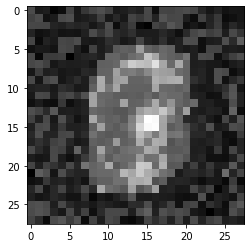

Epoch         70 D-cost 161106352.0000 G-cost -14615.7314 


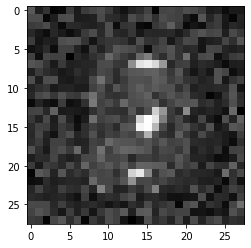

Epoch         80 D-cost 42630.1523 G-cost 6097.1577 


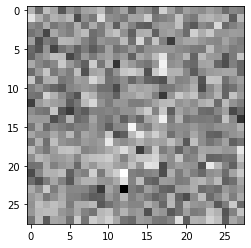

Epoch         90 D-cost -108984.7656 G-cost 92846.4297 


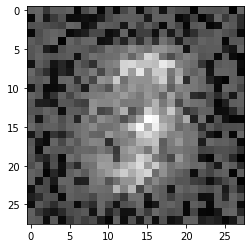

Epoch        100 D-cost 35097.5742 G-cost 3362.7432 


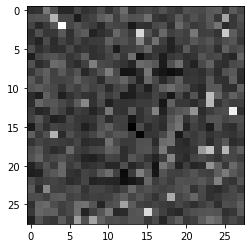

Epoch        110 D-cost 36309.3867 G-cost 4073.3625 


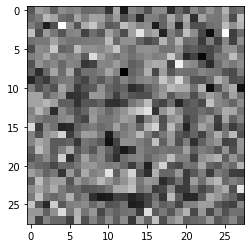

Epoch        120 D-cost 33990.2852 G-cost 2361.9604 


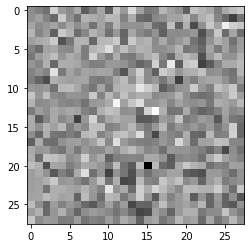

Epoch        130 D-cost 31423.1562 G-cost 1514.8683 


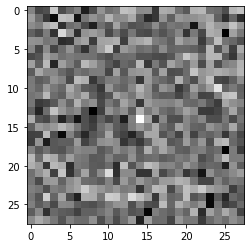

Epoch        140 D-cost 28924.4180 G-cost 974.1176 


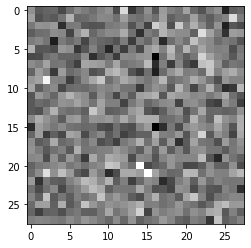

Epoch        150 D-cost 26389.3789 G-cost 2006.9487 


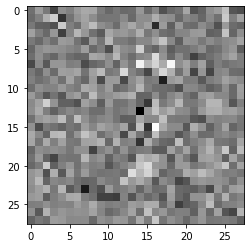

Epoch        160 D-cost 24240.8613 G-cost 2372.5601 


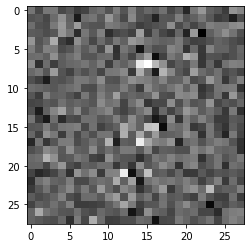

Epoch        170 D-cost 22134.6270 G-cost 2980.2163 


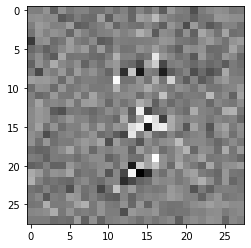

Epoch        180 D-cost 20142.4590 G-cost 4451.9307 


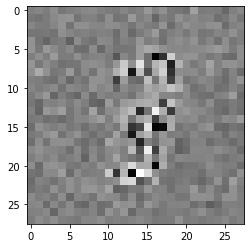

Epoch        190 D-cost 18102.4785 G-cost 5797.4849 


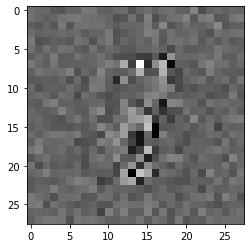

Epoch        200 D-cost 16327.6465 G-cost 6020.1411 


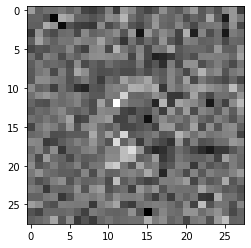

Epoch        210 D-cost 14511.3838 G-cost 6422.7700 


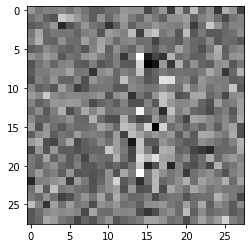

Epoch        220 D-cost 12303.8945 G-cost 6905.2563 


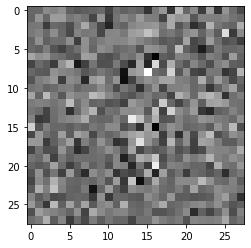

Epoch        230 D-cost 10552.6748 G-cost 7435.4121 


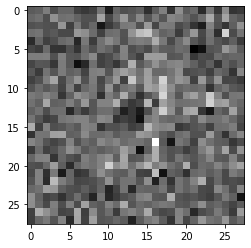

Epoch        240 D-cost 8960.8848 G-cost 8166.4839 


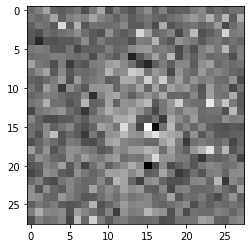

Epoch        250 D-cost 7614.1270 G-cost 8404.5479 


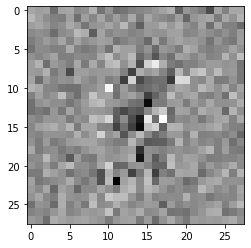

Epoch        260 D-cost 6472.5410 G-cost 8890.1396 


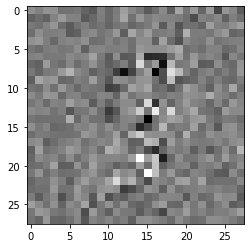

Epoch        270 D-cost 5254.3652 G-cost 8827.9307 


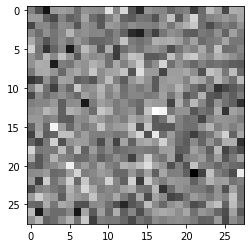

Epoch        280 D-cost 3994.4573 G-cost 8542.9570 


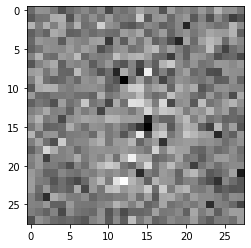

Epoch        290 D-cost 3324.2292 G-cost 6175.5415 


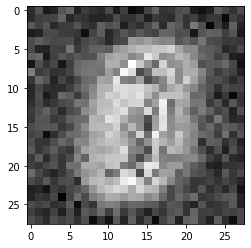

Epoch        300 D-cost 2213771.7500 G-cost -27278.5664 


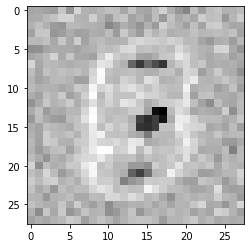

Epoch        310 D-cost -250191.0625 G-cost -30352.6953 


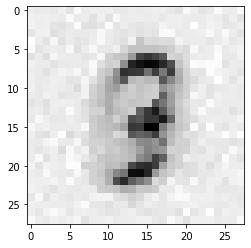

Epoch        320 D-cost -750214.5625 G-cost -42816.1992 


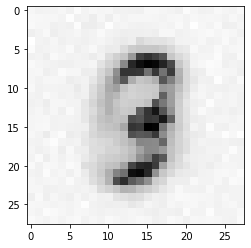

Epoch        330 D-cost -1842092.5000 G-cost -71787.6250 


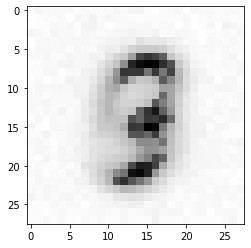

Epoch        340 D-cost -4909275.0000 G-cost -152874.5938 


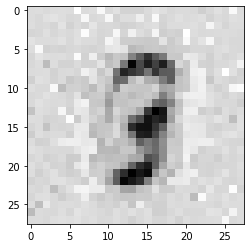

KeyboardInterrupt: ignored

In [1]:
#!/usr/bin/env python3
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(0)
np.random.seed(0)

def main():
    # ハイパーパラメータの設定
    MiniBatchSize = 300
    NoiseSize = 100 # GANはランダムなノイズベクトルから何かを生成する方法なので，そのノイズベクトルのサイズを設定する．
    MaxEpoch = 500
    GeneratorLearningNumber = 1
    CriticLearningNumber = 5
    GradientPenaltyCoefficient = 10
    
    # データセットの読み込み
    (learnX, learnT), (_, _) = tf.keras.datasets.mnist.load_data()
    learnX = np.asarray(learnX.reshape([60000, 784]), dtype="float32")
    learnX = (learnX - 127.5) / 127.5
    
    # 生成器と識別器の構築
    generator = Generator() # 下のクラスを参照．
    critic = Critic() # 下のクラスを参照．
    
    # コスト関数と正確度を計算する関数の生成
    costComputer = tf.keras.losses.SparseCategoricalCrossentropy()
    
    # オプティマイザは生成器と識別器で別々のものを利用
    optimizerGenerator = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0,beta_2=0.9)
    optimizerCritic = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0,beta_2=0.9)
    
    # 生成器を成長させるためのコストを計算する関数
    def generatorCostFunction(criticOutputFromGenerated):
        cost = -tf.reduce_mean(criticOutputFromGenerated) # 生成器のコストの引数は生成器の出力を識別器に入れた結果．生成器としては全部正解を出しているはずなので教師はすべて1となるはず．そのように学習すべき．
        return cost
    
    # 識別器を成長させるためのコストを計算する関数
    def criticCostFunction(criticOutputFromReal,criticOutputFromGenerated): # 識別器のコストの引数は本物の情報を識別器に入れた結果と生成器の出力を識別器に入れた結果．
        cost = tf.reduce_mean(criticOutputFromGenerated) - tf.reduce_mean(criticOutputFromReal)
        return cost
    
    @tf.function()
    def runCritic(generator, critic, noiseVector, realVector):
        with tf.GradientTape() as criticTape:
            generatedVector = generator(noiseVector) # 生成器によるデータの生成．
            criticOutputFromGenerated = critic(generatedVector) # その生成データを識別器に入れる．
            criticOutputFromReal = critic(realVector) # 本物データを識別器に入れる．
            epsilon = tf.random.uniform(generatedVector.shape, minval=0, maxval=1)
            intermediateVector = generatedVector + epsilon * (realVector - generatedVector)
            # 勾配ペナルティ
            with tf.GradientTape() as gradientPenaltyTape:
                gradientPenaltyTape.watch(intermediateVector)
                criticOutputFromIntermediate = critic(intermediateVector)
                gradientInterData = gradientPenaltyTape.gradient(criticOutputFromIntermediate, intermediateVector)
                gradientNorm = tf.norm(gradientInterData, ord="euclidean", axis=1)
                gradientPenalty = tf.reduce_mean((gradientNorm - 1)**2)
            # 識別器の成長
            criticCost = criticCostFunction(criticOutputFromReal, criticOutputFromGenerated)
            criticCost = criticCost + GradientPenaltyCoefficient * gradientPenalty
            gradientCritic = criticTape.gradient(criticCost, critic.trainable_variables) # 識別器のパラメータだけで勾配を計算．つまり生成器のパラメータは行わない．
            optimizerCritic.apply_gradients(zip(gradientCritic, critic.trainable_variables))
            return criticCost
    
    @tf.function()
    def runGenerator(generator, critic, noiseVector):
        with tf.GradientTape() as generatorTape:
            generatedVector = generator(noiseVector) # 生成器によるデータの生成．
            criticOutputFromGenerated = critic(generatedVector) # その生成データを識別器に入れる．
            # 生成器の成長
            generatorCost = generatorCostFunction(criticOutputFromGenerated)
            gradientGenerator = generatorTape.gradient(generatorCost,generator.trainable_variables) # 生成器のパラメータで勾配を計算．
            optimizerGenerator.apply_gradients(zip(gradientGenerator,generator.trainable_variables))
            return generatorCost
    
    # ミニバッチセットの生成
    learnX = tf.data.Dataset.from_tensor_slices(learnX) # このような方法を使うと簡単にミニバッチを実装することが可能．
    learnT = tf.data.Dataset.from_tensor_slices(learnT)
    learnA = tf.data.Dataset.zip((learnX, learnT)).shuffle(60000).batch(MiniBatchSize) # 今回はインプットデータしか使わないけど後にターゲットデータを使う場合があるため．
    miniBatchNumber = len(list(learnA.as_numpy_iterator()))
    # 学習ループ
    for epoch in range(1,MaxEpoch+1):
        criticCost, generatorCost = 0, 0
        # WGAN-gpでは識別器1回に対して生成器を複数回学習させるのでそのためのループ．
        for _ in range(CriticLearningNumber):
            for learnx, _ in learnA:
                noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
                criticCostPiece = runCritic(generator, critic, noiseVector, learnx)
                criticCost += criticCostPiece / (CriticLearningNumber * miniBatchNumber)
        # WGAN-gpでは識別器1回に対して生成器を複数回学習させるのでそのためのループ．
        for _ in range(GeneratorLearningNumber):
            for _ in range(miniBatchNumber):
                noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
                generatorCostPiece = runGenerator(generator, critic, noiseVector)
                generatorCost += generatorCostPiece / (GeneratorLearningNumber * miniBatchNumber)
        # 疑似的なテスト
        if epoch%10 == 0:
            print("Epoch {:10d} D-cost {:6.4f} G-cost {:6.4f} ".format(epoch,float(criticCost),float(generatorCost)))
            validationNoiseVector = generateNoise(1, NoiseSize)
            validationOutput = generator(validationNoiseVector)
            validationOutput = np.asarray(validationOutput).reshape([1, 28, 28])
            plt.imshow(validationOutput[0], cmap = "gray")
            plt.pause(1)

# 入力されたデータを0か1に分類するネットワーク
class Critic(tf.keras.Model):
    def __init__(self):
        super(Critic,self).__init__()
        self.d1 = tf.keras.layers.Dense(units=128)
        self.d2 = tf.keras.layers.Dense(units=128)
        self.d3 = tf.keras.layers.Dense(units=128)
        self.d4 = tf.keras.layers.Dense(units=1)
        self.a = tf.keras.layers.LeakyReLU()
        self.dropout = tf.keras.layers.Dropout(0.5)
    def call(self,x):
        y = self.d1(x)
        y = self.a(y)
        y = self.dropout(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.dropout(y)
        y = self.d3(y)
        y = self.a(y)
        y = self.dropout(y)
        y = self.d4(y)
        return y

# 入力されたベクトルから別のベクトルを生成するネットワーク
class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator,self).__init__()
        self.d1=tf.keras.layers.Dense(units=256)
        self.d2=tf.keras.layers.Dense(units=256)
        self.d3=tf.keras.layers.Dense(units=784)
        self.a=tf.keras.layers.LeakyReLU()
        self.b1=tf.keras.layers.BatchNormalization()
        self.b2=tf.keras.layers.BatchNormalization()
    def call(self,x):
        y = self.d1(x)
        y = self.a(y)
        y = self.b1(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.b2(y)
        y = self.d3(y)
        return y

def generateNoise(miniBatchSize, randomNoiseSize):
    return np.random.uniform(-1,1,size=(miniBatchSize,randomNoiseSize)).astype("float32")

if __name__ == "__main__":
    main()

敵対的生成ネットワークとは

### 原理

生成器，識別器，生成器のコスト関数，識別器のコスト関数

トランスフォーマーとはアテンションとポジショナルエンコードといわれる技術を用いて，再帰型ニューラルネットワークとは異なる方法で文字列を処理することができるニューラルネットワークの構造です．機械翻訳や質問応答に利用することができます．

例えば，機械翻訳の場合，翻訳したい文字列を入力データ，翻訳結果の文字列を教師データとして利用します．構築した人工知能は翻訳したい文字列を入力値として受け取り，配列を出力します．配列の各要素は文字の個数と同じサイズのベクトル（その要素が何の文字なのかを示す確率ベクトル）です．

トランスフォーマーはエンコーダーとデコーダーという構造からなります．エンコーダーは配列（機械翻訳の場合，翻訳したい配列）を入力にして，同じ長さの配列を出力します．デコーダーも配列（機械翻訳の場合，翻訳で得たい配列）とエンコーダーが出力した配列を入力にして同じ長さの配列（各要素は確率ベクトル）を出力します．エンコーダーが出力した配列情報をデコーダーで処理する際にアテンションという技術が利用されます．

<img src="https://github.com/yamada-kd/binds-training/blob/main/image/transformer.svg?raw=1" width="100%" />

エンコーダーとデコーダー間のアテンション以外にも，エンコーダーとデコーダーの内部でもそれぞれアテンション（セルフアテンション）が計算されます．アテンションは文字列内における文字の関連性を計算します．

トランスフォーマーは再帰型ニューラルネットワークで行うような文字の逐次的な処理が不要です．よって，計算機の並列化性能をより引き出せます．扱える文脈の長さも無限です（再帰型ニューラルネットワークでも理論上無限です．）．

このトランスフォーマーはものすごい性能を発揮しており，これまでに作られてきた様々な構造を過去のものとしました．特に応用の範囲が広いのはトランスフォーマーのエンコーダーの部分です．BERT と呼ばれる方法を筆頭に自然言語からなる配列を入力にして何らかの分散表現を出力する方法として自然言語処理に関わる様々な研究開発に利用されています．

（会話でトランスフォーマーという場合は，トランスフォーマーのエンコーダーまたはデコーダーのことを言っている場合があります．エンコーダー・デコーダー，エンコーダー，デコーダー，この3個でそれぞれできることが異なります．）

```{hint}
実用上，配列を入力にして配列を返す構造とだけ覚えておけば問題はないと思います．
```

### できること

Hugging Face で扱うことができるタスクは以下に示すものがあります．これ以外にもありますが自然言語処理に関する代表的なタスクを抽出しました．括弧内の文字列は実際に Hugging Face を利用する際に指定するオプションです（後で利用します．）．

    

*   感情分析（`sentiment-analysis`）：入力した文章が有する感情を予測
*   特徴抽出（`feature-extraction`）：入力した文章をその特徴を示すベクトルに変換
*   穴埋め（`fill-mask`）：文章中のマスクされた単語を予測
*   固有表現抽出（`ner`）：入力した文章中の固有表現（名前とか場所とか）にラベルをつける
*   質問応答（`question-answering`）：質問文とその答えが含まれる何らかの説明文を入力として解答文を生成
*   要約（`summarization`）：入力した文章を要約
*   文章生成（`text-generation`）：文章を入力にして，その文章に続く文章を生成
*   翻訳（`translation`）：文章を他の言語に翻訳
*   ゼロショット文章分類（`zero-shot-classification`）：文章とそれが属する可能性があるいくつかのカテゴリを入力にしてその文章をひとつのカテゴリに分類
    
    

## 基本的な構造

最も基本的な GAN の構造は以下のプログラムに含まれるものです．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(0)
np.random.seed(0)

def main():
    # ハイパーパラメータの設定
    MiniBatchSize = 300
    NoiseSize = 100 # GANはランダムなノイズベクトルから何かを生成する方法なので，そのノイズベクトルのサイズを設定する．
    MaxEpoch = 500
    
    # データセットの読み込み
    (learnX, learnT), (_, _) = tf.keras.datasets.mnist.load_data()
    learnX = learnX.reshape([60000, 784])
    learnX = (learnX - 127.5) / 127.5
    
    # 生成器と識別器の構築
    generator = Generator() # 下のクラスを参照．
    discriminator = Discriminator() # 下のクラスを参照．
    
    # コスト関数と正確度を計算する関数の生成
    costComputer = tf.keras.losses.SparseCategoricalCrossentropy()
    accuracyComputer = tf.keras.metrics.SparseCategoricalAccuracy()
    
    # オプティマイザは生成器と識別器で別々のものを利用
    optimizerGenerator = tf.keras.optimizers.Adam(learning_rate=0.0001)
    optimizerDiscriminator = tf.keras.optimizers.Adam(learning_rate=0.00004)
    
    # 生成器を成長させるためのコストを計算する関数
    def generatorCostFunction(discriminatorOutputFromGenerated):
        cost = costComputer(tf.ones(discriminatorOutputFromGenerated.shape[0]), discriminatorOutputFromGenerated) # 生成器のコストの引数は生成器の出力を識別器に入れた結果．生成器としては全部正解を出しているはずなので教師はすべて1となるはず．そのように学習すべき．
        accuracy = accuracyComputer(tf.ones(discriminatorOutputFromGenerated.shape[0]), discriminatorOutputFromGenerated)
        return cost, accuracy
    
    # 識別器を成長させるためのコストを計算する関数
    def discriminatorCostFunction(discriminatorOutputFromReal,discriminatorOutputFromGenerated): # 識別器のコストの引数は本物の情報を識別器に入れた結果と生成器の出力を識別器に入れた結果．
        realCost = costComputer(tf.ones(discriminatorOutputFromReal.shape[0]), discriminatorOutputFromReal) # 本物の情報の場合はすべて正例（1）と判断すべき．これが例のコスト関数の左の項に相当．
        fakeCost = costComputer(tf.zeros(discriminatorOutputFromGenerated.shape[0]), discriminatorOutputFromGenerated) # 偽物の情報の場合はすべて負例（0）と判断すべき．これが例のコスト関数の右の項に相当．
        cost = realCost + fakeCost
        realAccuracy = accuracyComputer(tf.ones(discriminatorOutputFromReal.shape[0]), discriminatorOutputFromReal)
        fakeAccuracy = accuracyComputer(tf.zeros(discriminatorOutputFromGenerated.shape[0]), discriminatorOutputFromGenerated)
        accuracy=(realAccuracy + fakeAccuracy) / 2
        return cost, accuracy
    
    @tf.function()
    def run(generator, discriminator, noiseVector, realVector):
        with tf.GradientTape() as generatorTape, tf.GradientTape() as discriminatorTape:
            generatedVector = generator(noiseVector) # 生成器によるデータの生成．
            discriminatorOutputFromGenerated = discriminator(generatedVector) # その生成データを識別器に入れる．
            discriminatorOutputFromReal = discriminator(realVector) # 本物データを識別器に入れる．
            # 識別器の成長
            discriminatorCost, discriminatorAccuracy = discriminatorCostFunction(discriminatorOutputFromReal, discriminatorOutputFromGenerated)
            gradientDiscriminator = discriminatorTape.gradient(discriminatorCost, discriminator.trainable_variables) # 識別器のパラメータだけで勾配を計算．つまり生成器のパラメータは行わない．
            optimizerDiscriminator.apply_gradients(zip(gradientDiscriminator, discriminator.trainable_variables))
            # 生成器の成長
            generatorCost, generatorAccuracy = generatorCostFunction(discriminatorOutputFromGenerated)
            gradientGenerator = generatorTape.gradient(generatorCost,generator.trainable_variables) # 生成器のパラメータで勾配を計算．
            optimizerGenerator.apply_gradients(zip(gradientGenerator,generator.trainable_variables))
            return discriminatorCost, discriminatorAccuracy, generatorCost, generatorAccuracy
    
    # ミニバッチセットの生成
    learnX = tf.data.Dataset.from_tensor_slices(learnX) # このような方法を使うと簡単にミニバッチを実装することが可能．
    learnT = tf.data.Dataset.from_tensor_slices(learnT)
    learnA = tf.data.Dataset.zip((learnX, learnT)).shuffle(60000).batch(MiniBatchSize) # 今回はインプットデータしか使わないけど後にターゲットデータを使う場合があるため．
    miniBatchNumber = len(list(learnA.as_numpy_iterator()))
    # 学習ループ
    for epoch in range(1,MaxEpoch+1):
        discriminatorCost, discriminatorAccuracy, generatorCost, generatorAccuracy = 0, 0, 0, 0
        for learnx, _ in learnA:
            noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
            discriminatorCostTmp, discriminatorAccuracyTmp, generatorCostTmp, generatorAccuracyTmp = run(generator, discriminator, noiseVector, learnx)
            discriminatorCost += discriminatorCostTmp / miniBatchNumber
            discriminatorAccuracy += discriminatorAccuracyTmp / miniBatchNumber
            generatorCost += generatorCostTmp / miniBatchNumber
            generatorAccuracy += generatorAccuracyTmp / miniBatchNumber
        # 疑似的なテスト
        if epoch%10 == 0:
            print("Epoch {:10d} D-cost {:6.4f} D-acc {:6.4f} G-cost {:6.4f} G-acc {:6.4f} ".format(epoch,float(discriminatorCost),float(discriminatorAccuracy),float(generatorCost),float(generatorAccuracy)))
            validationNoiseVector = generateNoise(1, NoiseSize)
            validationOutput = generator(validationNoiseVector)
            validationOutput = np.asarray(validationOutput).reshape([1, 28, 28])
            plt.imshow(validationOutput[0], cmap = "gray")
            plt.pause(1)

# 入力されたデータを0か1に分類するネットワーク
class Discriminator(tf.keras.Model):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.d1 = tf.keras.layers.Dense(units=128)
        self.d2 = tf.keras.layers.Dense(units=128)
        self.d3 = tf.keras.layers.Dense(units=128)
        self.d4 = tf.keras.layers.Dense(units=2, activation="softmax")
        self.a = tf.keras.layers.LeakyReLU()
        self.d = tf.keras.layers.Dropout(0.5)
    def call(self,x):
        y = self.d1(x)
        y = self.a(y)
        y = self.d(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.d(y)
        y = self.d3(y)
        y = self.a(y)
        y = self.d(y)
        y = self.d4(y)
        return y

# 入力されたベクトルから別のベクトルを生成するネットワーク
class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator,self).__init__()
        self.d1=tf.keras.layers.Dense(units=256)
        self.d2=tf.keras.layers.Dense(units=256)
        self.d3=tf.keras.layers.Dense(units=784)
        self.a=tf.keras.layers.LeakyReLU()
        self.b1=tf.keras.layers.BatchNormalization()
        self.b2=tf.keras.layers.BatchNormalization()
    def call(self,x):
        y = self.d1(x)
        y = self.a(y)
        y = self.b1(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.b2(y)
        y = self.d3(y)
        return y

def generateNoise(miniBatchSize, randomNoiseSize):
    return np.random.uniform(-1,1,size=(miniBatchSize,randomNoiseSize)).astype("float32")

if __name__ == "__main__":
    main()

とても簡単に自然言語処理を実現することができる利用方法を紹介します．世界最高性能を求めたいとかでないなら，ここで紹介する方法を利用して様々なことを達成できると思います．

### 感情分析

最も簡単な `tranformers` の利用方法は以下のようになると思います．`pipeline` を読み込んで，そこに取り組みたいタスク（`sentiment-analysis`）を指定します．初回の起動の際には事前学習済みモデルがダウンロードされるため時間がかかります．

In [ ]:
#!/usr/bin/env python3
from transformers import pipeline
 
def main():
    classifier = pipeline("sentiment-analysis")
    text = "I have a pen."
    result = classifier(text)
    print(result)

if __name__ == "__main__":
    main()

入力した文章がポジティブな文章なのかネガティブな文章なのかを分類できます．ここでは1個の文章を入力しましたが，以下のように2個以上の文章も入力可能です．

In [ ]:
#!/usr/bin/env python3
from transformers import pipeline
 
def main():
    classifier = pipeline("sentiment-analysis")
    litext = ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
    result = classifier(litext)
    print(result)

if __name__ == "__main__":
    main()

## WGAN-gp

これまでに利用したものとは異なるモデルを利用したいとか，自身が持っているデータセットにより適合させたいとかの応用的な利用方法を紹介します．

### 他のモデルの利用

これまでに，Hugging Face が自動でダウンロードしてくれたデフォルトの事前学習済みモデルを利用した予測を行いましたが，そうでなくて，モデルを指定することもできます．以下のページをご覧ください．Model Hub と言います．

https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads


この Model Hub の Tasks というところでタグを選択できます．例えば，Text Generation の `distilgpt2` を利用するには以下のように書きます．

In [ ]:
#!/usr/bin/env python3
from transformers import pipeline
 
def main():
    generator = pipeline("text-generation", model="distilgpt2")
    text = "In this course, we will teach you how to"
    result = generator(text)
    print(result)

if __name__ == "__main__":
    main()

## Conditional GAN

```{note}
終わりです．
```